Source: http://hilpisch.com/Continuum_N_Body_Simulation_Numba_27072013.html#/5/1

In [1]:
%matplotlib inline

from __future__ import division

import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nParticles = 5
particle = np.random.standard_normal((nParticles, 2))
particlev = np.zeros_like(particle)

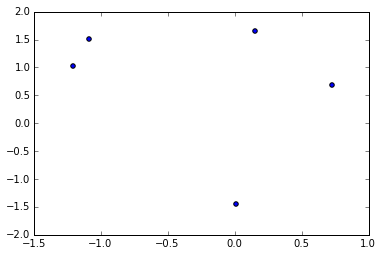

In [3]:
plt.scatter(particle[:,0], particle[:,1])

In [4]:
old_particle = np.copy(particle)

In [5]:
def nbody(particle, particlev):  # NumPy arrays as input
    position_history = np.zeros(())
    t0 = time.time(); nSteps = 5000; dt = 0.01
    for step in range(1, nSteps + 1, 1):
        for i in range(nParticles):
            Fx = 0.0; Fy = 0.0; # Fz = 0.0
            for j in range(nParticles):
                if j != i:
                    # Differential is distance between particle i and j's
                    dx = particle[j,0] - particle[i,0]
                    dy = particle[j,1] - particle[i,1]
#                    dz = particle[j,2] - particle[i,2]
                    drSquared = dx * dx + dy * dy # + dz * dz
                    drPowerN32 = 1.0 / (drSquared + np.sqrt(drSquared))
                    Fx += dx * drPowerN32
                    Fy += dy * drPowerN32
#                    Fz += dz * drPowerN32
                particlev[i, 0] += dt * Fx
                particlev[i, 1] += dt * Fy
#                particlev[i, 2] += dt * Fz
        for i in range(nParticles):
            particle[i,0] += particlev[i,0] * dt
            particle[i,1] += particlev[i,1] * dt
#            particle[i,2] += particlev[i,2] * dt


In [6]:
import numba as nb

In [7]:
nbody_nb = nb.autojit(nbody)
firstrun = nbody_nb(particle, particlev)

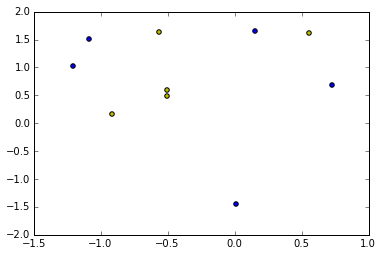

In [8]:
plt.scatter(old_particle[:,0], old_particle[:,1])
plt.scatter(particle[:,0], particle[:,1], c='y')

In [9]:
print particle.shape

(5L, 2L)


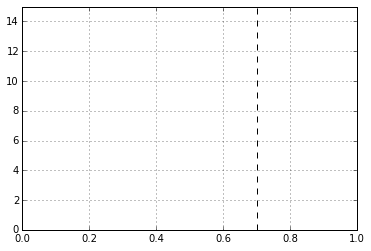

In [10]:
import scipy.stats as ss
from matplotlib.animation import FuncAnimation

class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = ss.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
        interval=100, blit=True)
plt.show()